In [72]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import glob
# import ffmpeg
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

# Set general font size
plt.rcParams['font.size'] = '14'

### 1. List audio files

In [73]:
# Read mp3
audio_files = []
for fn_mp3 in glob.glob("audio/*"):
    audio_files.append(fn_mp3)
audio_files

['audio/190607.mp3',
 'audio/220340.mp3',
 'audio/47214-Band-winged Nightjar.mp3',
 'audio/337258.mp3',
 'audio/337257.mp3',
 'audio/220339.mp3',
 'audio/220338.mp3',
 'audio/204956.mp3',
 'audio/262782.mp3',
 'audio/262783.mp3']

### 2. Choose audio test file and load into librosa

In [74]:
### Choose audio file for notebook
audio_file = audio_files[2] # 'audio/47214-Band-winged Nightjar.mp3'

In [75]:
# load time series of audio amplitudes and sampling rate
# Note by default librosa sets the sampling rate to 22,050 Hz. This can be changed.
import_sample_rate = 22050
y, sr = librosa.load(audio_file, sr=import_sample_rate)

print(f"""\
  For file {audio_file}:
  Sampling rate={sr} Hz,
  amplitudes type={type(y)}
  amplitudes data type={y.dtype}
  amplitudes shape={y.shape}""")

  For file audio/47214-Band-winged Nightjar.mp3:
  Sampling rate=22050 Hz,
  amplitudes type=<class 'numpy.ndarray'>
  amplitudes data type=float32
  amplitudes shape=(255168,)


### 3. Waveform in time domain  - amplitude vs time

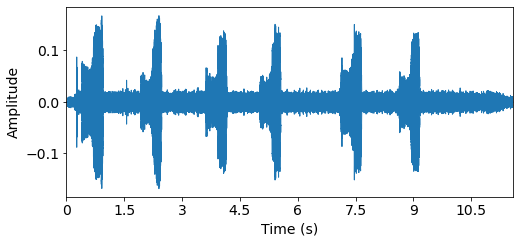

In [76]:
# Plot waveform using librosa function waveplot()
# Note: librosa uses a wrapper on matplotlib to display charts
# X-axis in seconds
fig, ax = plt.subplots(figsize=(8, 3.5))
librosa.display.waveplot(y, sr, x_axis='s')
plt.ylabel('Amplitude')
plt.show()

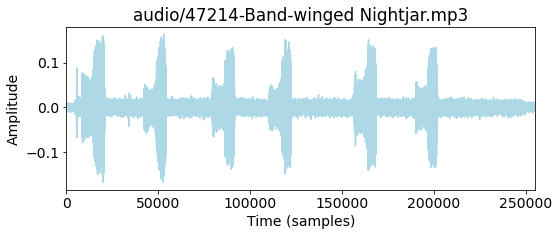

In [77]:
# Plot waveform using matplotlib directly and play file

def print_plot_play(amplitudes, sampling_rate, title=''):
    """1. Prints information about an audio signal, 2. plots the waveform, and 3. Creates player
    Args: 
        amplitudes: Input signal amplitudes
        sampling_rate: Sampling rate of input signal    
        text: Text to print
    """
    plt.figure(figsize=(8, 3.5))
    plt.plot(amplitudes, color='lightblue')
    plt.xlim([0, amplitudes.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=amplitudes, rate=sampling_rate))

    
print_plot_play(amplitudes=y, sampling_rate=sr, title=audio_file)

### 5. Waveform in frequency and time domain - Spectrograms

### 5.1 Short Fourier Transform: Time Domain --> Frequency Domain
  
https://librosa.org/doc/latest/generated/librosa.stft.html#librosa.stft
    
#### librosa stft default parameter values:
sampling rate: sr = 22,050 Hz  
snippets per frame: n_fft = 2,048  
hop length (frame increment) = 512  
  
The stft function in librosa is Discrete Fourier Transform as its input is a digitial waveform.  
The output output of the stft function is a complex number than indicates spectral magnitude and phase.  
  
We are only interested in the magnitude and not the phase. We can extract this information from the complex number output by taking the absolute value with np.abs(). 
The absolute value will actually give us the square of the spectral magnitude.


In [78]:
### Select parameters for fourier transforms below
# Define snippets per frame. librosa sets this to 2048 by default.
n_fft = 2048
# Define hop length. librosa sets this to 512 by default
hop_length = 512

In [79]:
###  Calculate spectrogram
S = np.abs(librosa.stft(y, n_fft = n_fft, hop_length=hop_length))

print(f"The shape of the sftf array is {S.shape}")
print(f"The number of rows in the sftf array, 'D' is '(1 + n_fft/2)=(1 + {n_fft}/2)'")
# The frame length in seconds is the frame size / sampling rate
print(f"The frame size of the sftf is 'snippets per frame'/'sample rate'={n_fft/sr:.4f} sec")
# The hop length in seconds is the hop length / sampling rate
print(f"The hop length of the sftf is 'hop length'/'sample rate'={hop_length/sr:.4f} sec")
# The max value of the sftf (that is display in a color hue on a spectogram)
print(f"The max value from the sftf is {max([max(item) for item in S]):.2f}")

The shape of the sftf array is (1025, 499)
The number of rows in the sftf array, 'D' is '(1 + n_fft/2)=(1 + 2048/2)'
The frame size of the sftf is 'snippets per frame'/'sample rate'=0.0929 sec
The hop length of the sftf is 'hop length'/'sample rate'=0.0232 sec
The max value from the sftf is 49.24


### 5.2 Spectrogram - Linear Axes and Linear Output

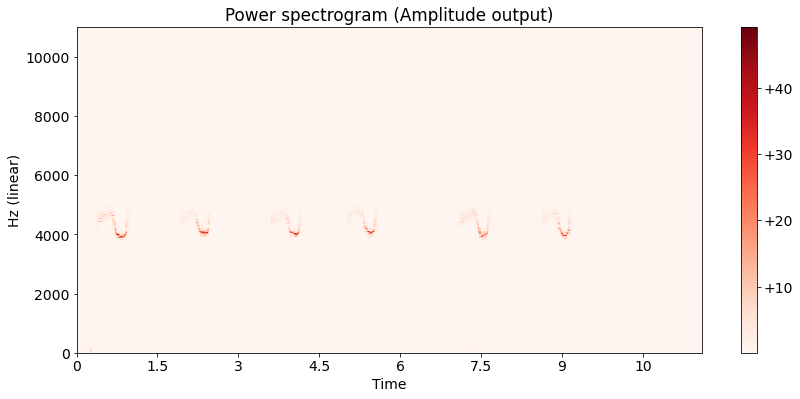

In [80]:
# Plot spectorgram with linear axes and linear output. Note that the linear y axis here is same as hz.
fig, ax = plt.subplots(figsize=(14, 6))
img = librosa.display.specshow(S, y_axis='linear', x_axis='time', ax=ax, cmap='Reds')
ax.set_title('Power spectrogram (Amplitude output)')
ax.set_ylabel('Hz (linear)')
fig.colorbar(img, ax=ax, format="%+2.0f")
plt.show()

### 5.3 Spectrogram - Linear Axes & Decibel output

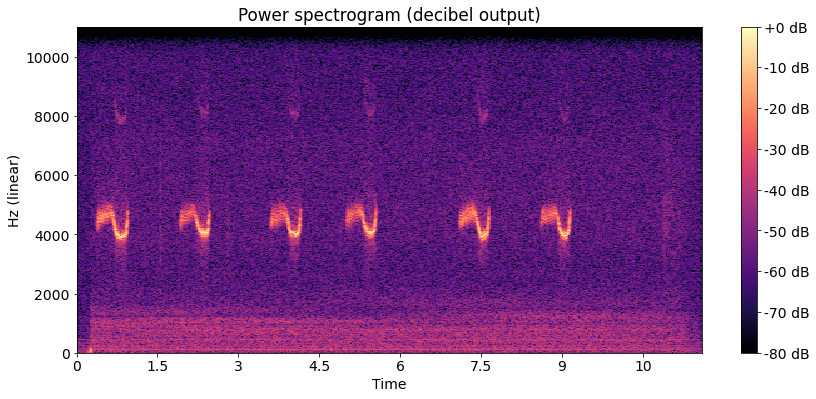

In [81]:
# Calculate decibels of amplitude. Use max amplitude with a reference of 0 dB.
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot spectrogram with linear axes and decibel output. 
fig, ax = plt.subplots(figsize=(14, 6))
img = librosa.display.specshow(S_db, y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Power spectrogram (decibel output)')
ax.set_ylabel('Hz (linear)')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

### 5.4 Spectrogram - Linear x-axis, Log y-axis, Decibel output

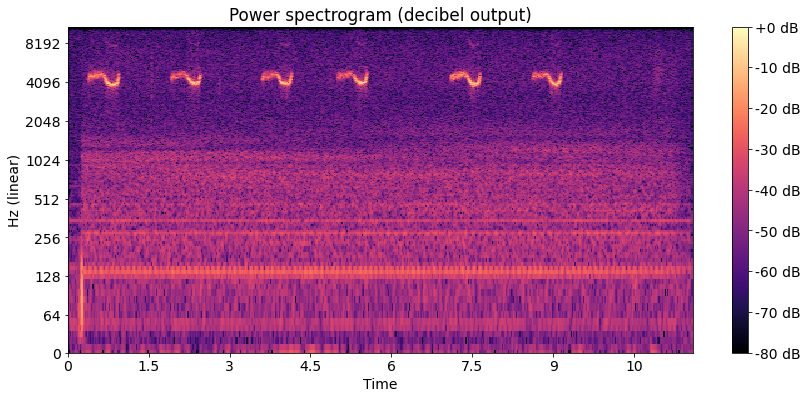

In [82]:
# Plot spectrogram with linear axes and decibel output. 
fig, ax = plt.subplots(figsize=(14, 6))
img = librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram (decibel output)')
ax.set_ylabel('Hz (linear)')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

### 5.5 Mel Spectrograms  - Linear x-axis, Mel y-axis, Decibel output
https://librosa.org/doc/0.8.0/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram

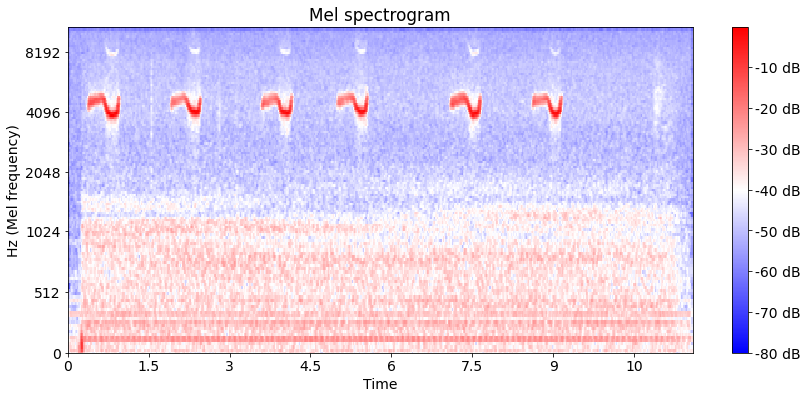

In [83]:
M = librosa.feature.melspectrogram(y=y, sr=sr, n_fft = n_fft, hop_length=hop_length)
M_db = librosa.power_to_db(M, ref=np.max)

fig, ax = plt.subplots(figsize=(14, 6))
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', sr=sr, ax=ax, cmap='bwr')
ax.set(title='Mel spectrogram')
ax.set_ylabel('Hz (Mel frequency)')
fig.colorbar(img, ax=ax, format="%+2.f dB")
# change font size for x axis
plt.show()

### 5.6 Constant Q Transform

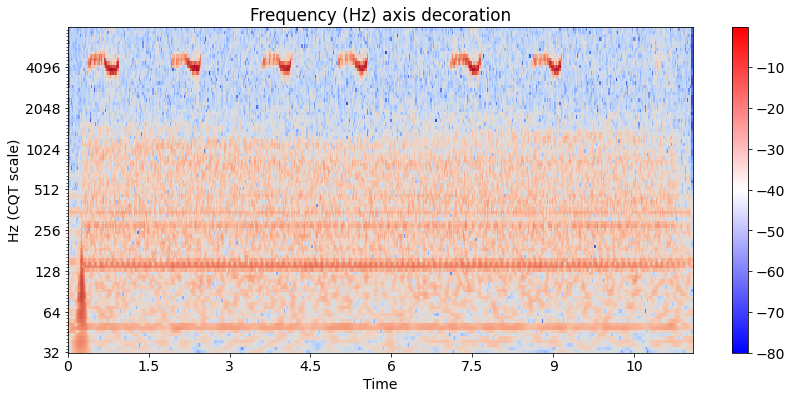

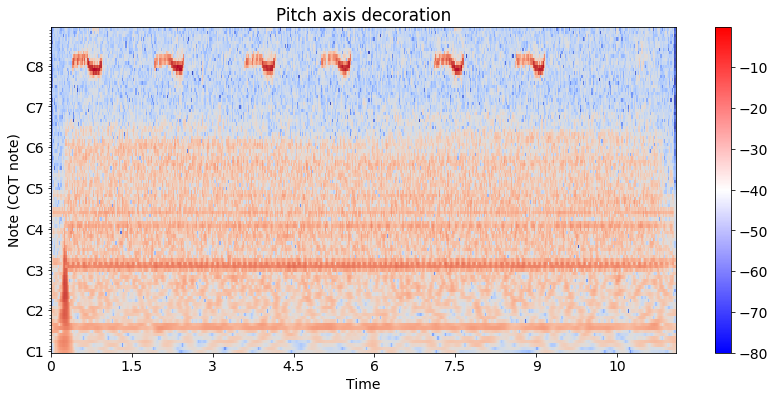

In [84]:
C = librosa.cqt(y=y, sr=sr, hop_length=hop_length, n_bins=96)
C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

fig, ax = plt.subplots(figsize=(14, 6))
librosa.display.specshow(C_db, y_axis='cqt_hz', x_axis='time', ax=ax, cmap='coolwarm')
ax.set(title='Frequency (Hz) axis decoration')
ax.set_ylabel('Hz (CQT scale)')
fig.colorbar(img, ax=ax)

fig, ax = plt.subplots(figsize=(14, 6))
librosa.display.specshow(C_db, y_axis='cqt_note', x_axis='time', ax=ax, cmap='coolwarm')
ax.set(title='Pitch axis decoration')
ax.set_ylabel('Note (CQT note)')
fig.colorbar(img, ax=ax)

plt.show()

### 5.7 Chromagram

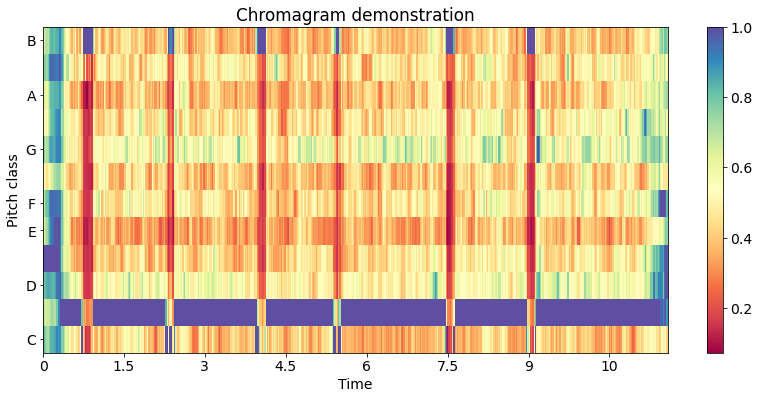

In [85]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots(figsize=(14, 6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax, cmap='Spectral')
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

plt.show()

**Note how in the audio snippet above the clip is centered around C sharp.**

### 5.8 Example of plotting several of the above charts together

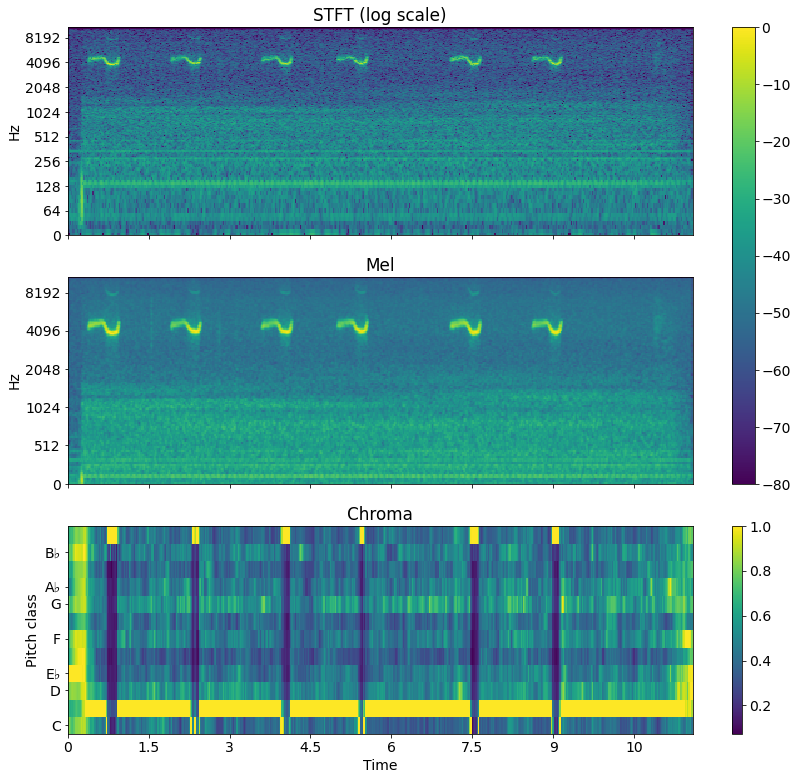

In [89]:
# Choose colormap
color_map = 'viridis'

# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 13))

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0], cmap=color_map)
ax[0].set(title='STFT (log scale)')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1], cmap=color_map)
ax[1].set(title='Mel')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[2], cmap=color_map)
ax[2].set(title='Chroma')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1]])

# Or have individual colorbars:
fig.colorbar(img3, ax=[ax[2]])

# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
# ax[0].set(xlim=[1, 5])  # Zoom to seconds 1-5

plt.show()

### 6. Spectral Novelty and Onset Detection
 
https://musicinformationretrieval.com/novelty_functions.html  
https://musicinformationretrieval.com/onset_detection.html  
https://librosa.org/doc/main/generated/librosa.onset.onset_detect.html#librosa.onset.onset_detect 

[0.06965986 0.30185941 1.97369615 3.64553288 5.03873016 7.66258503]


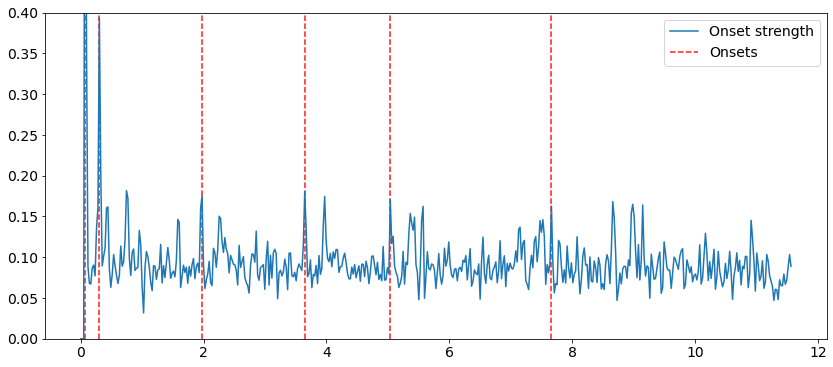

In [100]:
# librosa.onset.onset_strength computes a novelty function using spectral flux.
spectral_novelty = librosa.onset.onset_strength(y, sr=sr)
frames = np.arange(len(spectral_novelty))
t = librosa.frames_to_time(frames, sr=sr)

onset_frames = librosa.onset.onset_detect(y=y, sr=sr, onset_envelope=spectral_novelty , hop_length=hop_length)
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

# S = np.abs(librosa.stft(y, n_fft = n_fft, hop_length=hop_length))


fig, ax = plt.subplots(figsize=(14, 6))

# librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])

# ax[0].set(title='Power spectrogram')

# ax[0].label_outer()

ax.plot(t, spectral_novelty, label='Onset strength')

ax.vlines(t[onset_frames], 0, spectral_novelty.max(), color='r', alpha=0.9,
          linestyle='--', label='Onsets')

ax.set(ylim=[0, 0.4])
ax.legend()
plt.show()